In [ ]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

import acquire, prepare

## 1. Spam Data
### a. Load and preapre the spam data set

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

In [ ]:
# Get total counts and the proportion of ham vs. spam

labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)

# Renmae the columns
labels.columns = ['n', 'percent']

# Print the labels
labels

In [ ]:
# Clean the text using helper function
df = prepare.prep_spam_data(df, 'text')

# Take a peak at the cleaned dataset
df.head()

In [ ]:
# Add a column with list of words
words = [re.sub(r'([^a-z0-9\s]\s.\s)', '', doc).split() for doc in df.clean]

# column will named words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

In [ ]:
# To finalize the preparation for exploration:
# 1. Add a feature that is the length of each document
# 2. Build a set of ham_words and spam_words to explore

ham_words = ' '.join(df[df.label == 'ham'].clean)
spam_words = ' '.join(df[df.label == 'spam'].clean)

# Remove any single character

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)

# Take a look at the spam_words
spam_words[:200]

### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [ ]:
# Use nltk to create a column with bigrams

df['bigrams'] = [list(nltk.ngrams(words, 2)) for words in df.words]
df.head()

In [ ]:
# Create the top 20 most frequent bigrams for the spam data

spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams.head()

In [ ]:
# Create the top 20 most frequent bigrams for the ham data

ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
ham_bigrams.head()

In [ ]:
# Visualize the top 20 most frequent bigrams for spam and ham datasets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ham_bigrams.plot.barh(ax=ax1, title='20 most frequenctly occurring ham bigrams',
                      xlabel='Frequency', ylabel='Bigram')

spam_bigrams.plot.barh(ax=ax2, title='20 most frequently occurring spam bigrams',
                       xlabel='Frequency', ylabel='Bigram')

plt.tight_layout()
plt.show()

In [ ]:
# Convert to dictionary to fit to the 'generate_from_frequencies' method

spam_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
ham_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}

spam_bigrams_dict

In [ ]:
# Create a WordCloud object for the bigrams

img_spam = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(spam_bigrams_dict)

img_ham = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(ham_bigrams_dict)

img_spam

In [ ]:
plt.figure(figsize=(13, 13))

plt.subplot(121)
plt.imshow(img_spam)
plt.axis('off')

plt.subplot(122)
plt.imshow(img_ham)
plt.axis('off')

plt.tight_layout()
plt.show()

### c. Is there any overlap in the bigrams for the spam data and the ham data?

In [ ]:
# Use set operation to answer the question: no overlap in the top 20 most frequent bigrams. 

set(spam_bigrams.index) & set(ham_bigrams.index)

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [ ]:
# Use nltk to create a column with bigrams

df['trigrams'] = [list(nltk.ngrams(words, 3)) for words in df.words]
df.head()

In [ ]:
# Create the top 20 most frequent trigrams for the spam and ham data

spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)

spam_trigrams

In [ ]:
# Visualize the top 20 most frequent trigrams for spam and ham datasets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ham_trigrams.plot.barh(ax=ax1, title='20 most frequenctly occurring ham trigrams',
                       xlabel='Frequency', ylabel='Trigram')

spam_trigrams.plot.barh(ax=ax2, title='20 most frequently occurring spam trigrams',
                        xlabel='Frequency', ylabel='Trigram')

plt.tight_layout()
plt.show()

In [ ]:
# Convert to dictionary to fit to the 'generate_from_frequencies' method

spam_trigrams_dict = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
ham_trigrams_dict = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}

spam_trigrams_dict

In [ ]:
# Create a WordCloud object for the bigrams

img_spam = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(spam_trigrams_dict)

img_ham = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(ham_trigrams_dict)

plt.figure(figsize=(13, 13))

plt.subplot(121)
plt.imshow(img_spam)
plt.axis('off')

plt.subplot(122)
plt.imshow(img_ham)
plt.axis('off')

plt.tight_layout()
plt.show()

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [ ]:
# Load the blog articles data using helping function

urls = acquire.get_blog_urls()
df = acquire.acquire_codeup_blogs(urls, cached=False)

In [86]:
# Print the shape
print(df.shape)

# Take a peek at the dataframe
df.head()

(20, 2)


,title,original
0,What is Machine Learning?,"There’s a lot we can learn about machines, and..."
1,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu..."
2,What is Python?,If you’ve been digging around our website or r...
3,Alumni Share their Journey into Web Development,Everyone starts somewhere. Many developers out...
4,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...


In [88]:
# Clean the dataset using helper function

df = prepare.prep_article_data(df, 'original')
df.head()

,title,original,stemmed,lemmatized,clean
0,What is Machine Learning?,"There’s a lot we can learn about machines, and...",there a lot we can learn about machin and ther...,there a lot we can learn about machine and the...,there lot learn machine there lot machine lear...
1,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",here at codeup we believ it time to revolution...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...
2,What is Python?,If you’ve been digging around our website or r...,if youv been dig around our websit or research...,if youve been digging around our website or re...,youve digging around website researching tech ...
3,Alumni Share their Journey into Web Development,Everyone starts somewhere. Many developers out...,everyon start somewher mani develop out there ...,everyone start somewhere many developer out th...,everyone start somewhere many developer didnt ...
4,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...


In [97]:
# Print the title
df.title

0                             What is Machine Learning?
1               Introducing Our Salary Refund Guarantee
2                                       What is Python?
3       Alumni Share their Journey into Web Development
4                     Codeup Grads Win CivTech Datathon
5        What is the Transition into Data Science Like?
6     Codeup on Inc. 5000 Fastest Growing Private Co...
7                 What is Codeup’s Application Process?
8                              Codeup Launches Houston!
9     How Codeup Alumni Helped Dallas Youth Fight CO...
10    Announcing: The Annie Easley Scholarship to Su...
11                 What Data Science Career is For You?
12                  How to Succeed in a Coding Bootcamp
13    How We’re Celebrating World Mental Health Day ...
14    What are the Math and Stats Principles You Nee...
15           What is an Employer Influenced Curriculum?
16                             What to Expect at Codeup
17                      Your Education is an Inv

**Takeaways**
- I am interested in how to succedd in the codeup, so I will focus on title[12].

In [91]:
# Add a column with list of words
words = [re.sub(r'([^a-z0-9\s]\s.\s)', '', doc).split() for doc in df.clean]

# column will named words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,title,original,stemmed,lemmatized,clean,words
0,What is Machine Learning?,"There’s a lot we can learn about machines, and...",there a lot we can learn about machin and ther...,there a lot we can learn about machine and the...,there lot learn machine there lot machine lear...,"[there, lot, learn, machine, there, lot, machi..."
1,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",here at codeup we believ it time to revolution...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...,"[codeup, believe, time, revolutionize, hiring,..."
2,What is Python?,If you’ve been digging around our website or r...,if youv been dig around our websit or research...,if youve been digging around our website or re...,youve digging around website researching tech ...,"[youve, digging, around, website, researching,..."
3,Alumni Share their Journey into Web Development,Everyone starts somewhere. Many developers out...,everyon start somewher mani develop out there ...,everyone start somewhere many developer out th...,everyone start somewhere many developer didnt ...,"[everyone, start, somewhere, many, developer, ..."
4,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack..."


In [95]:
# Use nltk to create a column with bigrams

df['bigrams'] = [list(nltk.ngrams(words, 2)) for words in df.words]
df.head()

,title,original,stemmed,lemmatized,clean,words,bigrams
0,What is Machine Learning?,"There’s a lot we can learn about machines, and...",there a lot we can learn about machin and ther...,there a lot we can learn about machine and the...,there lot learn machine there lot machine lear...,"[there, lot, learn, machine, there, lot, machi...","[(there, lot), (lot, learn), (learn, machine),..."
1,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",here at codeup we believ it time to revolution...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...,"[codeup, believe, time, revolutionize, hiring,...","[(codeup, believe), (believe, time), (time, re..."
2,What is Python?,If you’ve been digging around our website or r...,if youv been dig around our websit or research...,if youve been digging around our website or re...,youve digging around website researching tech ...,"[youve, digging, around, website, researching,...","[(youve, digging), (digging, around), (around,..."
3,Alumni Share their Journey into Web Development,Everyone starts somewhere. Many developers out...,everyon start somewher mani develop out there ...,everyone start somewhere many developer out th...,everyone start somewhere many developer didnt ...,"[everyone, start, somewhere, many, developer, ...","[(everyone, start), (start, somewhere), (somew..."
4,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack...","[(many, codeup), (codeup, alumnus), (alumnus, ..."


In [107]:
# Create the top 20 most frequent words for the 'how to succeed' dataset

advice = pd.Series(list(nltk.ngrams(df.words[12], 1))).value_counts().head(20)
advice.head()

(practice,)    8
(prework,)     6
(student,)     6
(time,)        6
(learning,)    5
dtype: int64

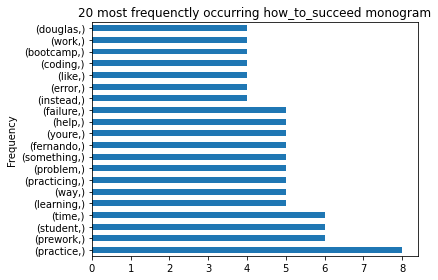

In [109]:
# Visualize the top 20 most frequent bigrams for spam and ham datasets

advice.plot.barh(title='20 most frequenctly occurring how_to_succeed monogram',
                 xlabel='Frequency', ylabel='Monogram')

plt.tight_layout()
plt.show()

In [115]:
# Convert to dictionary to fit to the 'generate_from_frequencies' method

advice_dict = {k[0]: v for k, v in advice.to_dict().items()}
advice_dict

{'practice': 8,
 'prework': 6,
 'student': 6,
 'time': 6,
 'learning': 5,
 'way': 5,
 'practicing': 5,
 'problem': 5,
 'something': 5,
 'fernando': 5,
 'youre': 5,
 'help': 5,
 'failure': 5,
 'instead': 4,
 'error': 4,
 'like': 4,
 'coding': 4,
 'bootcamp': 4,
 'work': 4,
 'douglas': 4}

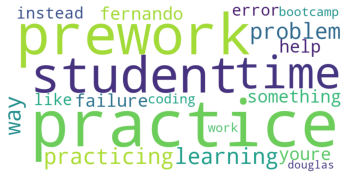

In [117]:
# Create a WordCloud object for the bigrams

img_advice = WordCloud(background_color = 'white', 
                       width=800, height=400).generate_from_frequencies(advice_dict)

plt.imshow(img_advice)
plt.axis('off')
plt.show()

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.